In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data_url = 'https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv'
df = pd.read_csv(data_url)
df.head()

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Source_IV,Country_ISO3
0,1,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN,GBR
1,2,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
2,3,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
3,4,confirmed,London,London,England,NaN,male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
4,5,confirmed,London,London,England,NaN,male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Israel'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Greece'),
  Text(15, 0, 'Austria'),
  Text(16, 0, 'Argentina'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Morocco'),
  Text(19, 0, 'Slovenia'),
  Text(20, 0, 'Scotland'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'United Arab Emirates'),
  Text(23, 0, 'Finland'),
  Text(24, 0, 'Wales'),
  Text(25, 0, 'Northern Ireland'),
  Text(26, 0, 'Sudan'),
  Text(27, 0, 'Bolivia'),

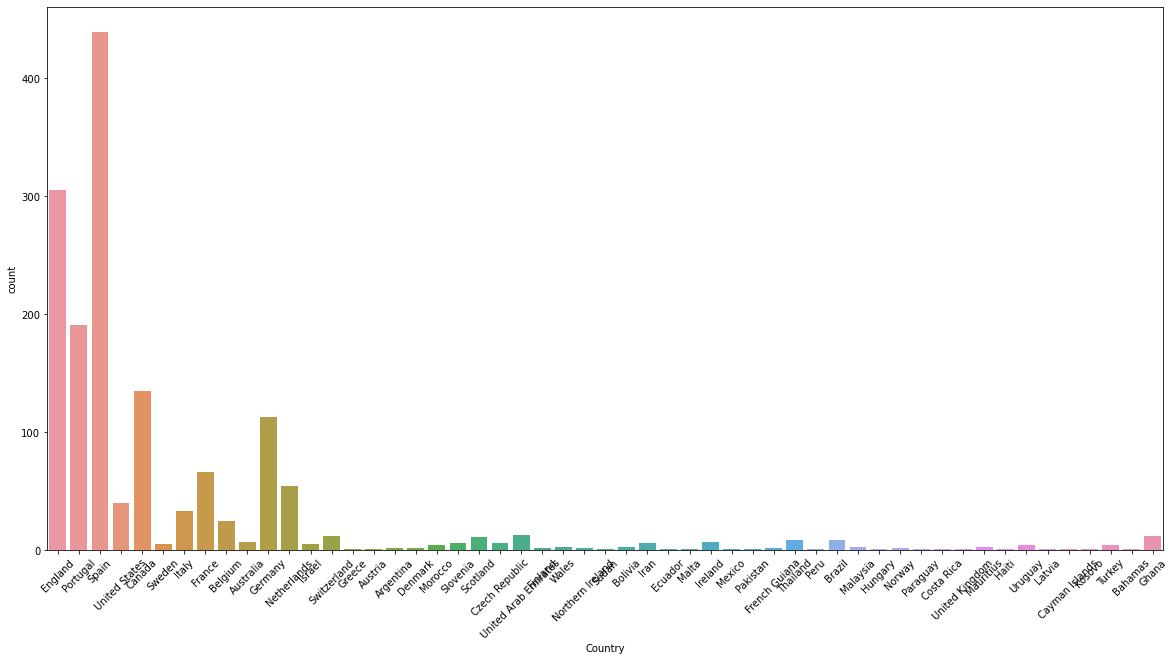

In [6]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Country', data=df)
plt.xticks(rotation=45)

In [10]:
cases_by_country = df.groupby('Country')['Status'].count().reset_index()
cases_by_country['Status'].nlargest()

42    439
13    305
39    191
7     135
17    113
Name: Status, dtype: int64

In [11]:
cases_by_country.nlargest(n=10, columns=['Status'])

,Country,Status
42,Spain,439
13,England,305
39,Portugal,191
7,Canada,135
17,Germany,113
15,France,66
33,Netherlands,54
50,United States,40
25,Italy,33
4,Belgium,25


In [16]:
fig = px.bar(cases_by_country, x='Country', y='Status', color='Country')
fig.show()

<AxesSubplot:>

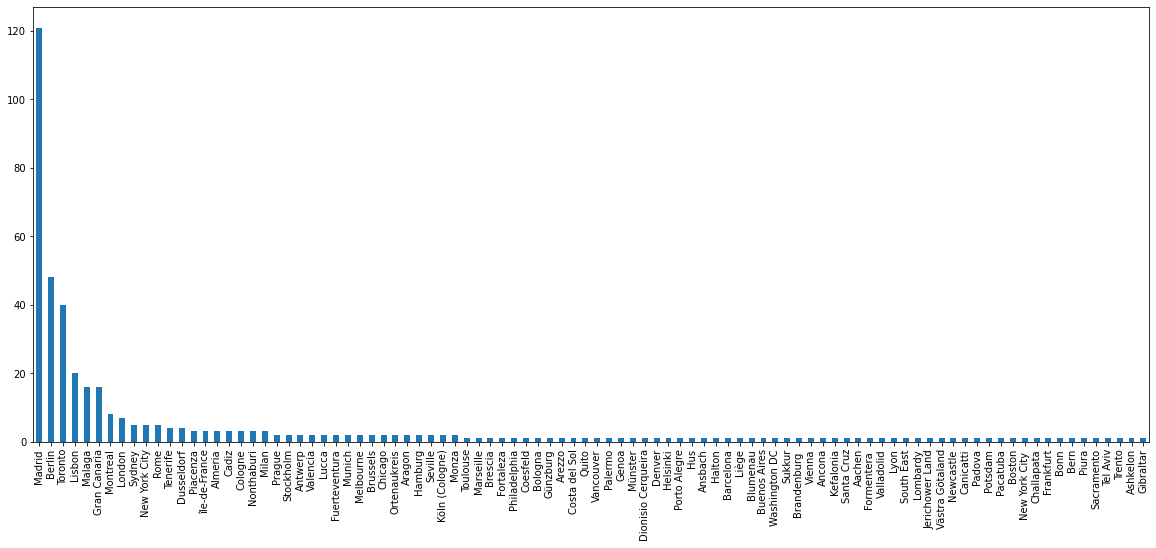

In [18]:
plt.figure(figsize=(20, 8))
df['City'].value_counts().plot(kind='bar')

In [28]:
def plot_distributions(data, x, y):
    fig = px.bar(data, x=x, y=y, color=x)
    fig.show()

In [29]:
cases_by_city = df.groupby('City')['Status'].count().reset_index()
plot_distributions(cases_by_city, 'City', 'Status')

In [30]:
df['Status'] 

0       confirmed
1       confirmed
2       confirmed
3       confirmed
4       confirmed
          ...    
1557    confirmed
1558    confirmed
1559    confirmed
1560    confirmed
1561    confirmed
Name: Status, Length: 1562, dtype: object

<AxesSubplot:xlabel='Status', ylabel='count'>

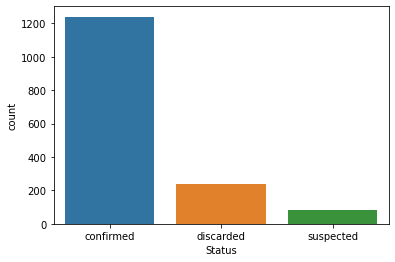

In [31]:
sns.countplot(x='Status', data=df)

In [33]:
df.groupby(['Status', 'Country']).size()

Status     Country  
confirmed  Argentina      2
           Australia      6
           Austria        1
           Belgium       24
           Canada       102
                       ... 
suspected  Pakistan       1
           Paraguay       1
           Spain         32
           Sudan          1
           Uruguay        1
Length: 67, dtype: int64

In [34]:
df['Country'].value_counts()

Spain                   439
England                 305
Portugal                191
Canada                  135
Germany                 113
France                   66
Netherlands              54
United States            40
Italy                    33
Belgium                  25
United Arab Emirates     13
Switzerland              12
Ghana                    12
Scotland                 11
Brazil                    9
Thailand                  9
Ireland                   7
Australia                 7
Iran                      6
Slovenia                  6
Czech Republic            6
Sweden                    5
Israel                    5
Turkey                    4
Morocco                   4
Uruguay                   4
Wales                     3
Malaysia                  3
Bolivia                   3
Mauritius                 3
French Guiana             2
Norway                    2
Finland                   2
Northern Ireland          2
Argentina                 2
Denmark             

In [35]:
df['Country'].value_counts().to_frame().nlargest(10, 'Country')

,Country
Spain,439
England,305
Portugal,191
Canada,135
Germany,113
France,66
Netherlands,54
United States,40
Italy,33
Belgium,25


In [42]:
top_reported_countries = list(df['Country'].value_counts().to_frame().nlargest(10, 'Country').index)
top_reported_countries

['Spain',
 'England',
 'Portugal',
 'Canada',
 'Germany',
 'France',
 'Netherlands',
 'United States',
 'Italy',
 'Belgium']

In [46]:
top_countries_df = df[df['Country'].isin(top_reported_countries)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Belgium'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Netherlands')])

<Figure size 1800x1080 with 0 Axes>

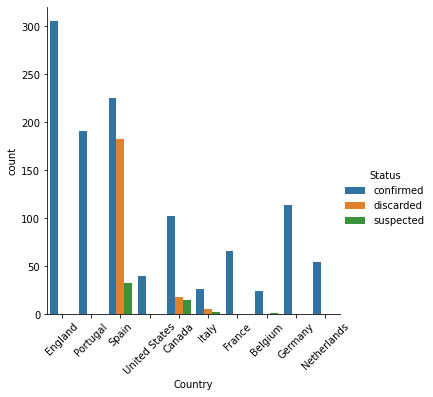

In [54]:
plt.figure(figsize=(25,15))
sns.catplot(data=top_countries_df, x='Country', kind='count', hue='Status')
plt.xticks(rotation=45)

In [56]:
df['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', nan, 'oral and genital ulcers, fever',
       'lesions', 'perianal papules; inguinal adenopathy',
       'genital ulcers', 'genital rash',
       'Slight swallowing difficulties and an elevated temperature',
       'fever, rash', 'skin rashes', 'fever, lesions', 'pustules, fever',
       'skin lesions', 'fever, cough, skin lesions',
       'fever, pustules on hands, body pains', 'blisters, high fever',
       'genital ulcer lesions', 'muscle aches, fever, skin lesions',
       'blisters', 'fever, skin lesions',
       'erythema with vesicles and papules, difficulty breathing, headache, fever',
       'skin lesions, spots on skin, severe anemia',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'fever, fatigue, headache, muscle pain',
       'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes',
       'fever, outbreak on the sk

In [59]:
docx = ' '.join(df['Symptoms'].fillna('0').to_list())

In [60]:
from wordcloud import WordCloud
def plot_wordcloud(text):
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show(block=True)

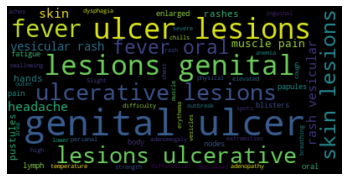

In [61]:
plot_wordcloud(docx)

In [63]:
from collections import Counter
word_freq = Counter(docx.split())
word_freq.most_common(10)

[('0', 1450),
 ('lesions', 63),
 ('genital', 53),
 ('ulcer', 30),
 ('fever', 22),
 ('skin', 21),
 ('ulcerative', 21),
 ('and', 21),
 ('oral', 17),
 ('ulcers,', 17)]

In [66]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Age', 'Gender',
       'Date_onset', 'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)',
       'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation',
       'Outcome', 'Contact_comment', 'Contact_ID', 'Contact_location',
       'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Date_entry', 'Date_last_modified', 'Source_III',
       'Source_IV', 'Country_ISO3'],
      dtype='object')

In [68]:
pd.to_datetime(df['Date_confirmation'])

0      2022-05-06
1      2022-05-12
2      2022-05-13
3      2022-05-15
4      2022-05-15
          ...    
1557   2022-06-08
1558   2022-06-08
1559   2022-06-08
1560   2022-06-08
1561   2022-06-08
Name: Date_confirmation, Length: 1562, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date_confirmation'>

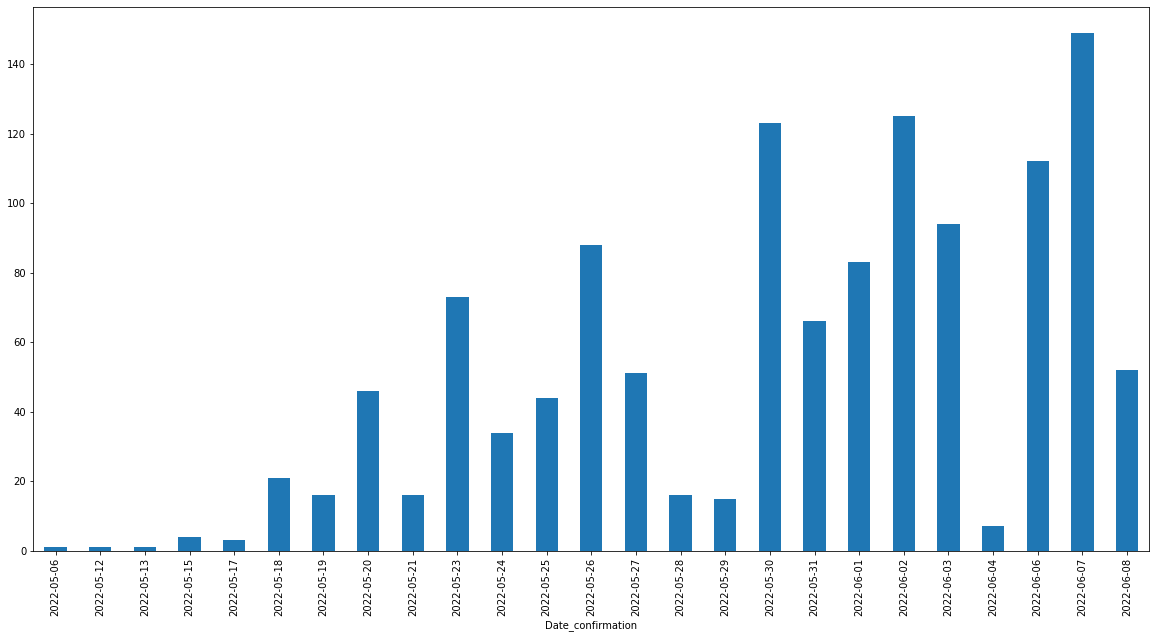

In [71]:
plt.figure(figsize=(20, 10))
df.groupby('Date_confirmation')['Status'].size().plot(kind='bar')

<AxesSubplot:xlabel='Date_confirmation'>

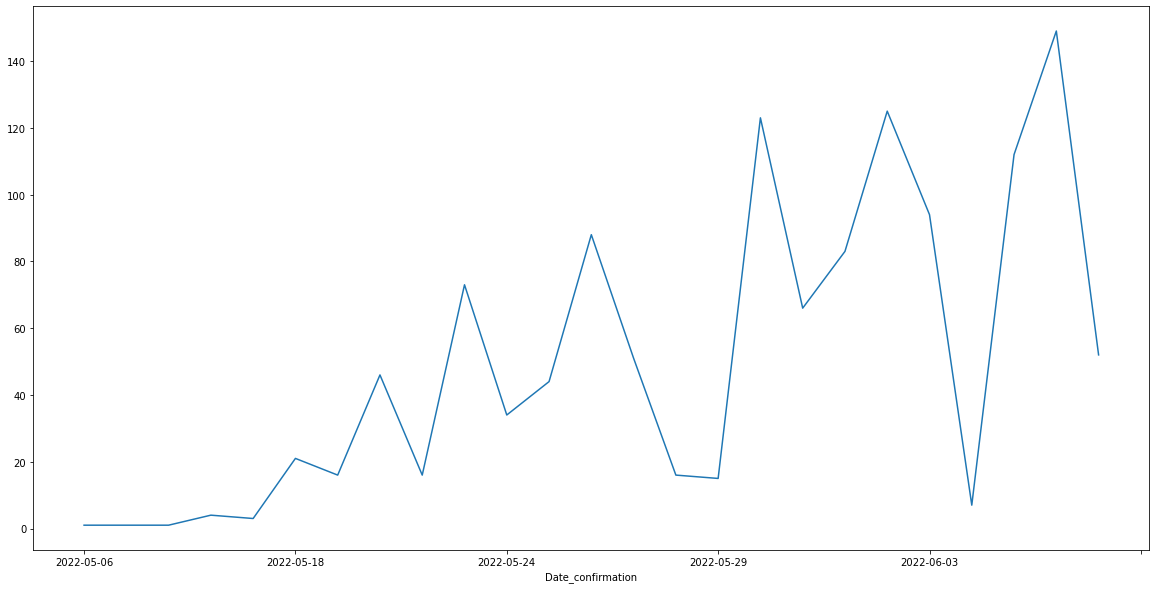

In [72]:
plt.figure(figsize=(20, 10))
df.groupby('Date_confirmation')['Status'].size().plot(kind='line')

In [73]:
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts()

Monday       308
Tuesday      252
Thursday     230
Wednesday    200
Friday       193
Saturday      39
Sunday        19
Name: Date_confirmation, dtype: int64

<AxesSubplot:>

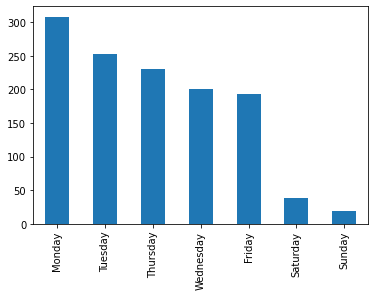

In [74]:
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts().plot(kind='bar')

In [75]:
pd.to_datetime(df['Date_onset']).dt.day_name().value_counts()

Friday      3
Monday      2
Saturday    1
Sunday      1
Tuesday     1
Thursday    1
Name: Date_onset, dtype: int64

In [76]:
pd.to_datetime(df['Date_entry']).dt.day_name().value_counts()

Wednesday    455
Tuesday      266
Monday       248
Thursday     229
Friday       196
Sunday        99
Saturday      69
Name: Date_entry, dtype: int64

<AxesSubplot:>

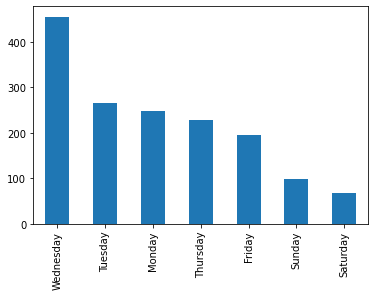

In [77]:
pd.to_datetime(df['Date_entry']).dt.day_name().value_counts().plot(kind='bar')